In [2]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

I grab the data from all the separate simulations and plot their colors all on the same plot

In [3]:
beta = ['0.1','0.2','0.3']
M_solar = ['0.001','0.01','0.1']
filetypes = ['sim','data']
fieldtypes = ['shallow','deep']
dict0 = dict()
dict1 = dict()
dict1['data_shallow'] = trigColors.trigColors("../DESY1_numepoch1_iz_real_text/*.dat",filetypes[1],fieldtypes[0])
dict1['data_deep'] = trigColors.trigColors("../DESY1_numepoch1_iz_real_text/*.dat",filetypes[1],fieldtypes[1])
dict0['data'] = dict1
shallow_trig_sel = dict1['data_shallow']['trigs'].astype('bool')
deep_trig_sel = dict1['data_deep']['trigs'].astype('bool')
shallow_photo_sel = ~dict1['data_shallow']['photoZcutsel']
deep_photo_sel = ~dict1['data_deep']['photoZcutsel']
shallow_multi_sel = dict1['data_shallow']['multitrig']
deep_multi_sel = dict1['data_deep']['multitrig']
shallow_sel = shallow_trig_sel & shallow_photo_sel & shallow_multi_sel
deep_sel = deep_trig_sel & deep_photo_sel & deep_multi_sel
data_deep_colors = dict1['data_deep']['colors'][deep_sel]
data_shallow_colors = dict1['data_shallow']['colors'][shallow_sel]
for b in beta:
    for M in M_solar:
        lc = 'b' + b + '_m' + M
        simpath = "../ZD_KNDES_" + lc + "/*DAT" 
        paths = [simpath,"../DESY1_numepoch1_iz_real_text/*.dat"]
        dict1=dict()
        for n,fieldtype in enumerate(fieldtypes):
            dict1['sim_'+fieldtype] = trigColors.trigColors(paths[0],'sim',fieldtype)
        dict0[lc] = dict1
        sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool')]        
        sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool')]     

des_utils.py:295: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
des_utils.py:317: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:


ValueError: x must have at least one data point

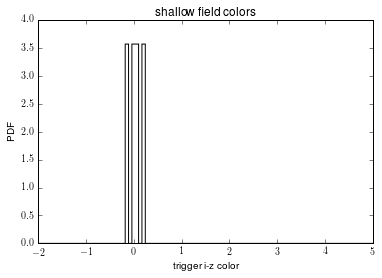

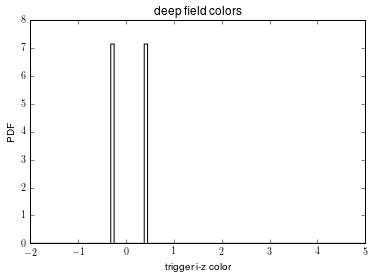

In [4]:
fig1 = plt.figure();
fig2 = plt.figure();
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax1.hist(data_shallow_colors,bins=100,alpha=1,range=(-2,5),normed=True,color='black',histtype='step')
ax2.hist(data_deep_colors,bins=100,alpha=1,range=(-2,5),normed=True,color='black',histtype='step')
ax1.set_title('shallow field colors')
ax2.set_title('deep field colors')
ax1.set_xlabel('trigger i-z color')
ax2.set_xlabel('trigger i-z color')
ax1.set_ylabel('PDF')
ax2.set_ylabel('PDF')
legendlist = ['real']
for b in beta:
    for M in M_solar:
        lc = 'b' + b + '_m' + M
        shallow_trig_sel = dict0[lc]['sim_shallow']['trigs'].astype('bool')
        deep_trig_sel = dict0[lc]['sim_deep']['trigs'].astype('bool')
        shallow_photo_sel = ~dict0[lc]['sim_shallow']['photoZcutsel']
        deep_photo_sel = ~dict0[lc]['sim_deep']['photoZcutsel']
        shallow_multi_sel = dict0[lc]['sim_shallow']['multitrig']
        deep_multi_sel = dict0[lc]['sim_deep']['multitrig']
        shallow_sel = shallow_trig_sel & shallow_photo_sel & shallow_multi_sel
        deep_sel = deep_trig_sel & deep_photo_sel & deep_multi_sel
        sim_deep_colors = dict0[lc]['sim_deep']['colors'][deep_sel]        
        sim_shallow_colors = dict0[lc]['sim_shallow']['colors'][shallow_sel] 
        ax1.hist(sim_shallow_colors,bins=100,alpha=0.5,range=(-2,5),normed=True,histtype='step')
        ax2.hist(sim_deep_colors,bins=100,alpha=0.5,range=(-2,5),normed=True,histtype='step')
        legendlist.append(r'$\beta= $'+b+', $M= $'+M)
ax1.legend(legendlist)
ax2.legend(legendlist)

In [5]:
lc = 'all'
simpath = "../ZD_KNDES_" + lc + "/*DAT" 
paths = [simpath,"../DESY1_numepoch1_iz_real_text/*.dat"]
dict1=dict()
for n,fieldtype in enumerate(fieldtypes):
    dict1['sim_'+fieldtype] = trigColors.trigColors(paths[0],'sim',fieldtype)
dict0[lc] = dict1

[]


/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in divide
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:40: RuntimeWarning: divide by zero encountered in divide


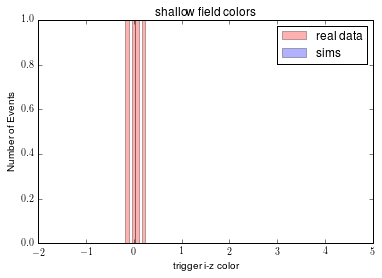

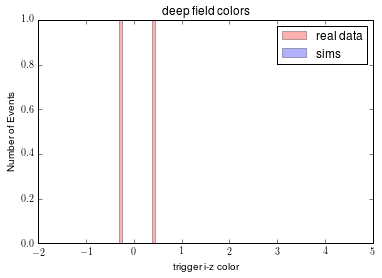

In [6]:
fig1 = plt.figure();
fig2 = plt.figure();
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
hist_data_deep, bins_data_deep = np.histogram(data_deep_colors, bins=100,range=(-2,5))
hist_data_shallow, bins_data_shallow = np.histogram(data_shallow_colors, bins=100,range=(-2,5))
normed_value_shallow = np.max(hist_data_shallow)
normed_value_deep = np.max(hist_data_shallow)
widths_data_deep = np.diff(bins_data_deep)
widths_data_shallow = np.diff(bins_data_shallow)
ax1.bar(bins_data_shallow[:-1], hist_data_shallow, widths_data_shallow,alpha=0.3,color='r')
ax2.bar(bins_data_deep[:-1], hist_data_deep, widths_data_deep,alpha=0.3,color='r')
#ax1.hist(data_shallow_colors,bins=100,alpha=1,range=(-2,5),color='black',histtype='step');
#ax2.hist(data_deep_colors,bins=100,alpha=1,range=(-2,5),color='black',histtype='step');
ax1.set_title('shallow field colors')
ax2.set_title('deep field colors')
ax1.set_xlabel('trigger i-z color')
ax2.set_xlabel('trigger i-z color')
ax1.set_ylabel('Number of Events')
ax2.set_ylabel('Number of Events')

sim_deep_colors = dict1['sim_deep']['colors'][dict1['sim_deep']['trigs'].astype('bool')]        
sim_shallow_colors = dict1['sim_shallow']['colors'][dict1['sim_shallow']['trigs'].astype('bool')]
shallow_trig_sel = dict0[lc]['sim_shallow']['trigs'].astype('bool')
deep_trig_sel = dict0[lc]['sim_deep']['trigs'].astype('bool')
shallow_photo_sel = ~dict0[lc]['sim_shallow']['photoZcutsel']
deep_photo_sel = ~dict0[lc]['sim_deep']['photoZcutsel']
shallow_multi_sel = dict0[lc]['sim_shallow']['multitrig']
deep_multi_sel = dict0[lc]['sim_deep']['multitrig']
shallow_sel = shallow_trig_sel & shallow_photo_sel & shallow_multi_sel
deep_sel = deep_trig_sel & deep_photo_sel & deep_multi_sel
sim_deep_colors = dict0[lc]['sim_deep']['colors'][deep_sel]        
sim_shallow_colors = dict0[lc]['sim_shallow']['colors'][shallow_sel] 
print sim_shallow_colors
hist_sim_deep, bins_sim_deep = np.histogram(sim_deep_colors, bins=100,range=(-2,5))
hist_sim_shallow, bins_sim_shallow = np.histogram(sim_shallow_colors, bins=100,range=(-2,5))
normed_value_shallow = np.max(hist_data_shallow)
normed_value_deep = np.max(hist_data_deep)
hist_sim_shallow = hist_sim_shallow * normed_value_shallow / np.max(hist_sim_shallow)
hist_sim_deep = hist_sim_deep * normed_value_deep / np.max(hist_sim_deep)
widths_sim_deep = np.diff(bins_sim_deep)
widths_sim_shallow = np.diff(bins_sim_shallow)
ax1.bar(bins_sim_shallow[:-1], hist_sim_shallow, widths_sim_shallow,alpha=0.3,color='b')
ax2.bar(bins_sim_deep[:-1], hist_sim_deep, widths_sim_deep,alpha=0.3,color='b')
ax1.legend(['real data','sims'])
ax2.legend(['real data','sims'])

In [ ]:
print len(data_shallow_colors)
print len(data_deep_colors)

In [ ]:
fig1 = plt.figure();
fig2 = plt.figure();
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
ax1.hist(data_shallow_colors,bins=100,alpha=1,range=(-2,5),normed=True,color='black',histtype='step')
ax2.hist(data_deep_colors,bins=100,alpha=1,range=(-2,5),normed=True,color='black',histtype='step')
ax1.set_title('shallow field colors')
ax2.set_title('deep field colors')
ax1.set_xlabel('trigger i-z color')
ax2.set_xlabel('trigger i-z color')
ax1.set_ylabel('PDF')
ax2.set_ylabel('PDF')
ax1.hist(sim_shallow_colors,bins=100,alpha=0.5,range=(-2,5),normed=True,histtype='step')
ax2.hist(sim_deep_colors,bins=100,alpha=0.5,range=(-2,5),normed=True,histtype='step')
ax1.legend(['real data','sim'])
ax2.legend(['real data','sim'])

I then plot the fluxes over all 

In [ ]:
fieldtypes = ['shallow','deep']
for f in fieldtypes:
    trig_sel = dict0['data']['data_'+f]['trigs'].astype('bool')
    photo_sel = ~dict0['data']['data_'+f]['photoZcutsel']
    multi_sel = dict0['data']['data_'+f]['multitrig']
    sel = trig_sel & photo_sel & multi_sel
    colors = dict0['data']['data_'+f]['colors'][sel]
    max_sel = (colors >= colors.max()) | (colors >= 1)
    print colors.max()
    for i in range(0,np.sum(max_sel)):
        plt.figure()
        zfluxes = dict0['data']['data_'+f]['zbandinfo'][sel][max_sel][i][2]
        zfluxcals = dict0['data']['data_'+f]['zbandinfo'][sel][max_sel][i][4]
        ifluxes = dict0['data']['data_'+f]['ibandinfo'][sel][max_sel][i][2]
        ifluxcals = dict0['data']['data_'+f]['ibandinfo'][sel][max_sel][i][4]
        znites = dict0['data']['data_'+f]['zbandinfo'][sel][max_sel][i][1]
        inites = dict0['data']['data_'+f]['ibandinfo'][sel][max_sel][i][1]
        ztrignitesel = dict0['data']['data_'+f]['zbandinfo'][sel][max_sel][i][0] == 2
        itrignitesel = dict0['data']['data_'+f]['ibandinfo'][sel][max_sel][i][0] == 2
        plt.errorbar(znites,zfluxes,yerr=zfluxcals);
        plt.errorbar(inites,ifluxes,yerr=ifluxcals);
        plt.legend(['z band', 'i band'])
        axes = plt.gca()
        ylims = axes.get_ylim()
        print ylims
        plt.vlines(znites[ztrignitesel],ymin = ylims[0],ymax=ylims[1])
        plt.vlines(inites[itrignitesel],ymin = ylims[0],ymax=ylims[1],linestyles='dashed',color='r')
        plt.title('very red trigger observation fluxes in real data, ' + f)
        plt.xlabel('MJD')
        plt.ylabel('flux')
    

In [ ]:
-2.5*(np.log10(15) - np.log10(45))